# 🌍 Comprehensive Cost of Living Analysis

This notebook provides advanced analytics and visualizations for cost of living data with generic column structures (x1, x2, x3, etc.).

## 📋 Features:
- **Smart Data Discovery**: Automatically identifies the most interesting metrics
- **Professional Visualizations**: 6 different types of analysis charts
- **Country & City Analysis**: Rankings and comparisons
- **Statistical Insights**: Correlations, distributions, and patterns
- **HTML Report Generation**: Professional dashboard output

---

## 🔧 Setup and Package Installation

In [1]:
# Install required packages
import subprocess
import sys

def install_packages():
    """Install required packages for analysis"""
    required_packages = ['matplotlib', 'seaborn', 'scipy', 'pandas', 'numpy']
    
    print("🔧 Installing required packages...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install"] + required_packages)
        print("✅ All packages installed successfully!")
        return True
    except Exception as e:
        print(f"❌ Error installing packages: {e}")
        return False

install_packages()

🔧 Installing required packages...
✅ All packages installed successfully!


True

In [2]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

print("📊 Visualization libraries loaded successfully!")
print(f"📈 Pandas version: {pd.__version__}")
print(f"🎨 Matplotlib version: {plt.matplotlib.__version__}")
print(f"📉 Seaborn version: {sns.__version__}")

📊 Visualization libraries loaded successfully!
📈 Pandas version: 2.2.3
🎨 Matplotlib version: 3.9.4
📉 Seaborn version: 0.13.2


## 📁 Data Loading and Initial Exploration

**Instructions**: 
1. Place your `costofliving.csv` file in the same directory as this notebook
2. Or update the `csv_file_path` variable below to point to your CSV file location

In [3]:
# Configuration - Update this path to your CSV file
csv_file_path = "data/cost_of_living.csv"  # Change this to your file path
output_dir = "data/visualizations"

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Load the data
try:
    print(f"📂 Loading data from: {csv_file_path}")
    df = pd.read_csv(csv_file_path)
    print(f"✅ Data loaded successfully!")
    print(f"📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    
    # Display basic info
    print("\n🔍 Column Information:")
    print(f"   - Total columns: {len(df.columns)}")
    print(f"   - Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}")
    print(f"   - Text columns: {len(df.select_dtypes(include=['object']).columns)}")
    
    # Show first few rows
    print("\n👀 First 3 rows:")
    display(df.head(3))
    
except FileNotFoundError:
    print(f"❌ Error: File '{csv_file_path}' not found!")
    print("📝 Please update the 'csv_file_path' variable with the correct path to your CSV file.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

📂 Loading data from: data/cost_of_living.csv
✅ Data loaded successfully!
📊 Dataset shape: 4,956 rows × 58 columns

🔍 Column Information:
   - Total columns: 58
   - Numeric columns: 56
   - Text columns: 2

👀 First 3 rows:


,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1


## 🔍 Smart Data Analysis Functions

In [4]:
def analyze_data_structure(df):
    """Analyze the structure of the dataset and identify key columns"""
    print("🔬 Analyzing data structure...")
    
    # Get numeric columns (x1, x2, x3, etc.)
    numeric_cols = [col for col in df.columns if col.startswith('x') and col[1:].isdigit()]
    numeric_cols.sort(key=lambda x: int(x[1:]))  # Sort x1, x2, x3, etc.
    
    analysis = {
        'total_rows': len(df),
        'total_columns': len(df.columns),
        'numeric_columns': numeric_cols,
        'cities': df['city'].nunique() if 'city' in df.columns else 0,
        'countries': df['country'].nunique() if 'country' in df.columns else 0,
        'data_quality_range': (df['data_quality'].min(), df['data_quality'].max()) if 'data_quality' in df.columns else (0, 0)
    }
    
    # Find columns with most variation (likely most interesting)
    if numeric_cols:
        variations = {}
        for col in numeric_cols:
            col_data = df[col].dropna()
            if len(col_data) > 0 and col_data.mean() != 0:
                variations[col] = col_data.std() / col_data.mean()
            else:
                variations[col] = 0
        
        # Get top 10 most variable columns
        top_variable_cols = sorted(variations.items(), key=lambda x: x[1], reverse=True)[:10]
        analysis['most_variable_columns'] = top_variable_cols
        
        # Get columns with highest average values
        high_value_cols = []
        for col in numeric_cols:
            mean_val = df[col].mean()
            if mean_val > 50:  # Threshold for "high" values
                high_value_cols.append((col, mean_val))
        
        analysis['high_value_columns'] = sorted(high_value_cols, key=lambda x: x[1], reverse=True)[:10]
    
    return analysis

# Run analysis
analysis = analyze_data_structure(df)

print(f"\n📈 Analysis Results:")
print(f"   🏙️  Cities analyzed: {analysis['cities']:,}")
print(f"   🌍 Countries covered: {analysis['countries']}")
print(f"   📊 Numeric metrics: {len(analysis['numeric_columns'])}")
print(f"   🎯 Data quality range: {analysis['data_quality_range'][0]} - {analysis['data_quality_range'][1]}")

if analysis['most_variable_columns']:
    print(f"\n🔥 Top 5 Most Variable Metrics:")
    for i, (col, var) in enumerate(analysis['most_variable_columns'][:5], 1):
        print(f"   {i}. {col} (variation: {var:.3f})")

🔬 Analyzing data structure...

📈 Analysis Results:
   🏙️  Cities analyzed: 4,898
   🌍 Countries covered: 215
   📊 Numeric metrics: 55
   🎯 Data quality range: 0 - 1

🔥 Top 5 Most Variable Metrics:
   1. x38 (variation: 48.930)
   2. x52 (variation: 1.935)
   3. x53 (variation: 1.525)
   4. x42 (variation: 1.052)
   5. x50 (variation: 0.972)


## 📊 Visualization Functions

In [5]:
def create_data_overview_plot(df, analysis, output_dir):
    """Create overview plots of the data structure"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📊 Dataset Overview', fontsize=18, fontweight='bold', y=0.98)
    
    # 1. Countries distribution
    if 'country' in df.columns:
        top_countries = df['country'].value_counts().head(15)
        bars = axes[0, 0].bar(range(len(top_countries)), top_countries.values, color='skyblue')
        axes[0, 0].set_title('🌍 Cities per Country (Top 15)', fontweight='bold')
        axes[0, 0].set_xticks(range(len(top_countries)))
        axes[0, 0].set_xticklabels(top_countries.index, rotation=45, ha='right')
        axes[0, 0].set_ylabel('Number of Cities')
        
        # Add value labels
        for bar, value in zip(bars, top_countries.values):
            axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                           str(value), ha='center', va='bottom')
    
    # 2. Data quality distribution
    if 'data_quality' in df.columns:
        axes[0, 1].hist(df['data_quality'], bins=20, alpha=0.7, color='lightgreen')
        axes[0, 1].set_title('📈 Data Quality Distribution', fontweight='bold')
        axes[0, 1].set_xlabel('Data Quality Score')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(df['data_quality'].mean(), color='red', linestyle='--', 
                          label=f'Mean: {df["data_quality"].mean():.1f}')
        axes[0, 1].legend()
    
    # 3. Average values of top variable columns
    if analysis['most_variable_columns']:
        top_cols = [col for col, _ in analysis['most_variable_columns'][:8]]
        means = [df[col].mean() for col in top_cols]
        bars = axes[1, 0].bar(range(len(top_cols)), means, color='lightcoral')
        axes[1, 0].set_title('🎯 Mean Values of Most Variable Metrics', fontweight='bold')
        axes[1, 0].set_xticks(range(len(top_cols)))
        axes[1, 0].set_xticklabels(top_cols, rotation=45)
        axes[1, 0].set_ylabel('Average Value')
        
        # Add value labels
        for bar, value in zip(bars, means):
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(means) * 0.01, 
                           f'{value:.1f}', ha='center', va='bottom')
    
    # 4. Missing data analysis
    sample_cols = analysis['numeric_columns'][:15] if len(analysis['numeric_columns']) > 15 else analysis['numeric_columns']
    missing_data = df[sample_cols].isnull().sum()
    if missing_data.sum() > 0:
        bars = axes[1, 1].bar(range(len(missing_data)), missing_data.values, color='orange')
        axes[1, 1].set_title('⚠️ Missing Values by Column', fontweight='bold')
        axes[1, 1].set_xticks(range(len(missing_data)))
        axes[1, 1].set_xticklabels(missing_data.index, rotation=45)
        axes[1, 1].set_ylabel('Missing Values Count')
    else:
        axes[1, 1].text(0.5, 0.5, '✅ No Missing Values!', ha='center', va='center', 
                       transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold')
        axes[1, 1].set_title('✅ Data Completeness', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/data_overview.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Data overview plot created!")

In [6]:
def create_city_rankings(df, analysis, output_dir):
    """Create city ranking visualizations"""
    if not analysis['most_variable_columns']:
        print("⚠️ No variable columns found for city rankings")
        return
    
    # Use the most variable column as primary ranking metric
    primary_metric = analysis['most_variable_columns'][0][0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'🏆 City Rankings by {primary_metric}', fontsize=18, fontweight='bold')
    
    # Top 20 cities
    top_cities = df.nlargest(20, primary_metric)
    y_pos = range(len(top_cities))
    bars1 = ax1.barh(y_pos, top_cities[primary_metric], color='gold')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels([f"{city} ({country})" for city, country in zip(top_cities['city'], top_cities['country'])])
    ax1.set_title('🥇 Top 20 Cities', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Value')
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars1, top_cities[primary_metric])):
        ax1.text(value + max(top_cities[primary_metric]) * 0.01, i, f'{value:.1f}', 
                va='center', fontsize=9, fontweight='bold')
    
    # Bottom 20 cities
    bottom_cities = df.nsmallest(20, primary_metric)
    y_pos = range(len(bottom_cities))
    bars2 = ax2.barh(y_pos, bottom_cities[primary_metric], color='lightblue')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([f"{city} ({country})" for city, country in zip(bottom_cities['city'], bottom_cities['country'])])
    ax2.set_title('🥉 Bottom 20 Cities', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Value')
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars2, bottom_cities[primary_metric])):
        ax2.text(value + max(bottom_cities[primary_metric]) * 0.01, i, f'{value:.1f}', 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/city_rankings.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ City rankings plot created!")

In [7]:
def create_correlation_analysis(df, analysis, output_dir):
    """Create correlation analysis of metrics"""
    if len(analysis['numeric_columns']) < 2:
        print("⚠️ Not enough numeric columns for correlation analysis")
        return
    
    # Select top 12 most variable columns for correlation analysis
    top_cols = [col for col, _ in analysis['most_variable_columns'][:12]]
    
    # Calculate correlation matrix
    corr_matrix = df[top_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(14, 12))
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                          square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
    
    plt.title('🔗 Correlation Matrix of Key Metrics', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/correlation_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Correlation matrix created!")

In [8]:
def create_country_analysis(df, analysis, output_dir):
    """Create country-level analysis"""
    if 'country' not in df.columns or not analysis['most_variable_columns']:
        print("⚠️ Cannot create country analysis - missing country data or metrics")
        return
    
    # Get top countries by number of cities
    top_countries = df['country'].value_counts().head(12).index
    
    # Select key metrics for country comparison
    key_metrics = [col for col, _ in analysis['most_variable_columns'][:4]]
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('🌍 Country-Level Analysis', fontsize=18, fontweight='bold')
    
    colors = plt.cm.Set3(np.linspace(0, 1, 12))
    
    for i, metric in enumerate(key_metrics):
        ax = axes[i//2, i%2]
        
        # Calculate mean values by country
        country_means = df[df['country'].isin(top_countries)].groupby('country')[metric].mean().sort_values(ascending=False)
        
        bars = ax.bar(range(len(country_means)), country_means.values, color=colors[:len(country_means)])
        ax.set_title(f'📊 Average {metric} by Country', fontweight='bold')
        ax.set_xticks(range(len(country_means)))
        ax.set_xticklabels(country_means.index, rotation=45, ha='right')
        ax.set_ylabel('Average Value')
        
        # Add value labels
        for bar, value in zip(bars, country_means.values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(country_means.values) * 0.01, 
                   f'{value:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/country_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Country analysis created!")

In [9]:
def create_distribution_analysis(df, analysis, output_dir):
    """Create distribution analysis of key metrics"""
    if not analysis['most_variable_columns']:
        print("⚠️ No variable columns found for distribution analysis")
        return
    
    # Select top 6 most variable columns
    top_cols = [col for col, _ in analysis['most_variable_columns'][:6]]
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('📈 Distribution Analysis of Key Metrics', fontsize=18, fontweight='bold')
    
    for i, col in enumerate(top_cols):
        ax = axes[i//3, i%3]
        
        # Create histogram with KDE
        data = df[col].dropna()
        ax.hist(data, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
        
        # Add KDE curve
        try:
            from scipy import stats
            kde = stats.gaussian_kde(data)
            x_range = np.linspace(data.min(), data.max(), 100)
            ax.plot(x_range, kde(x_range), 'r-', linewidth=3, label='KDE')
            ax.legend()
        except:
            pass
        
        ax.set_title(f'📊 Distribution of {col}', fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        
        # Add statistics text
        mean_val = data.mean()
        std_val = data.std()
        median_val = data.median()
        
        stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}'
        ax.text(0.65, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/distribution_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Distribution analysis created!")

In [10]:
def create_scatter_matrix(df, analysis, output_dir):
    """Create scatter plot matrix of top metrics"""
    if len(analysis['most_variable_columns']) < 3:
        print("⚠️ Not enough variable columns for scatter matrix")
        return
    
    # Select top 4 most variable columns
    top_cols = [col for col, _ in analysis['most_variable_columns'][:4]]
    
    fig, axes = plt.subplots(4, 4, figsize=(16, 16))
    fig.suptitle('🔍 Scatter Plot Matrix of Key Metrics', fontsize=18, fontweight='bold')
    
    for i, col1 in enumerate(top_cols):
        for j, col2 in enumerate(top_cols):
            ax = axes[i, j]
            
            if i == j:
                # Diagonal: histogram
                ax.hist(df[col1].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
                ax.set_title(f'{col1}', fontsize=10, fontweight='bold')
            else:
                # Off-diagonal: scatter plot
                ax.scatter(df[col2], df[col1], alpha=0.5, s=20, color='coral')
                ax.set_xlabel(col2 if i == 3 else '')
                ax.set_ylabel(col1 if j == 0 else '')
                
                # Add correlation coefficient
                corr = df[[col1, col2]].corr().iloc[0, 1]
                ax.text(0.05, 0.95, f'r={corr:.3f}', transform=ax.transAxes, 
                       verticalalignment='top', fontweight='bold', 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/scatter_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Scatter matrix created!")

## 🎨 Generate All Visualizations

Now let's create all the visualizations!

🎨 Creating all visualizations...

1️⃣ Creating data overview...


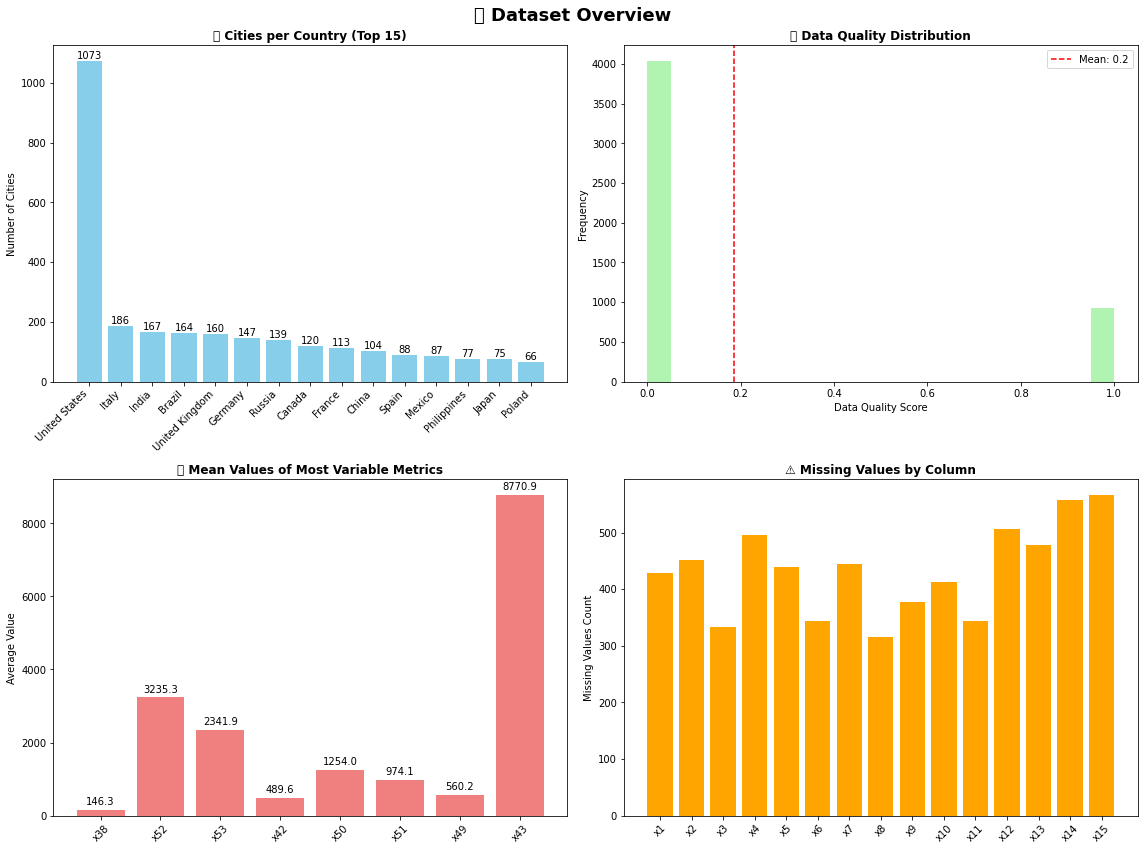

✅ Data overview plot created!


In [11]:
print("🎨 Creating all visualizations...\n")

# 1. Data Overview
print("1️⃣ Creating data overview...")
create_data_overview_plot(df, analysis, output_dir)


2️⃣ Creating city rankings...


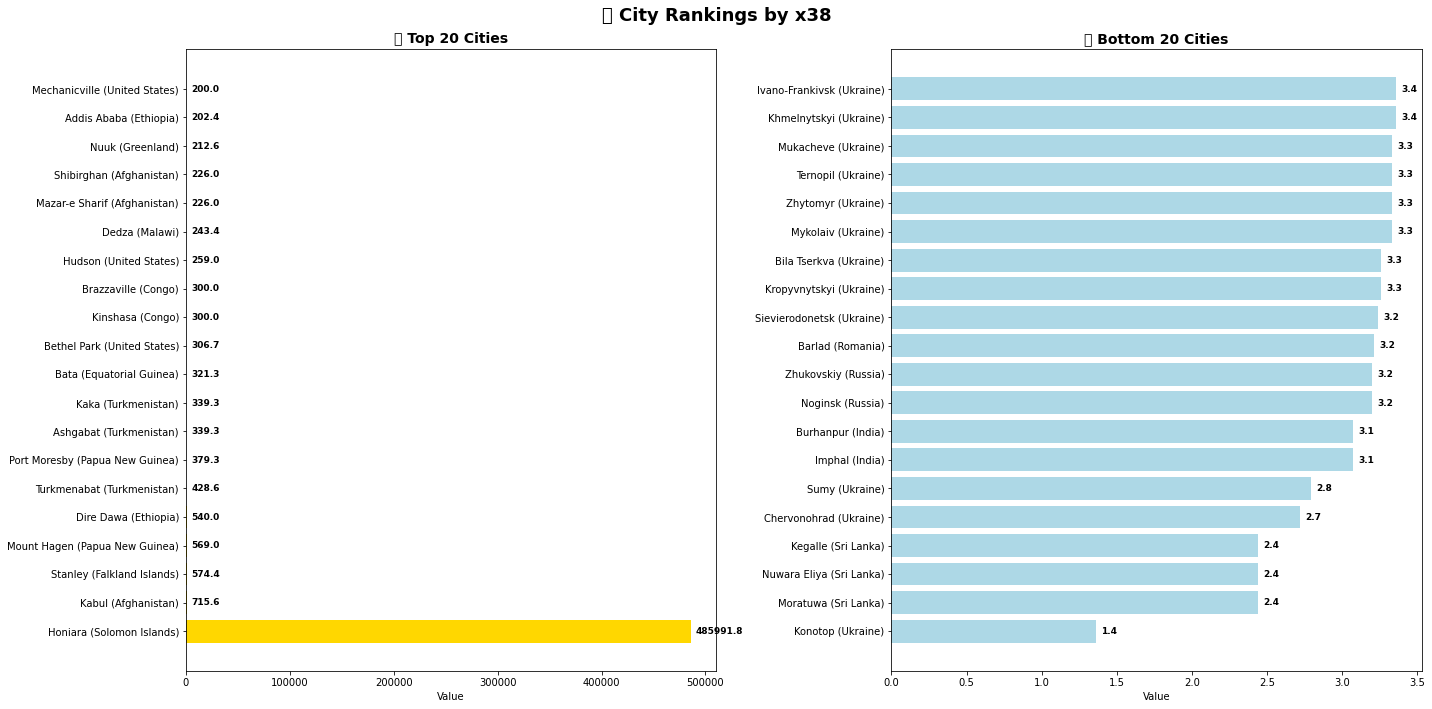

✅ City rankings plot created!


In [12]:
# 2. City Rankings
print("\n2️⃣ Creating city rankings...")
create_city_rankings(df, analysis, output_dir)


3️⃣ Creating correlation analysis...


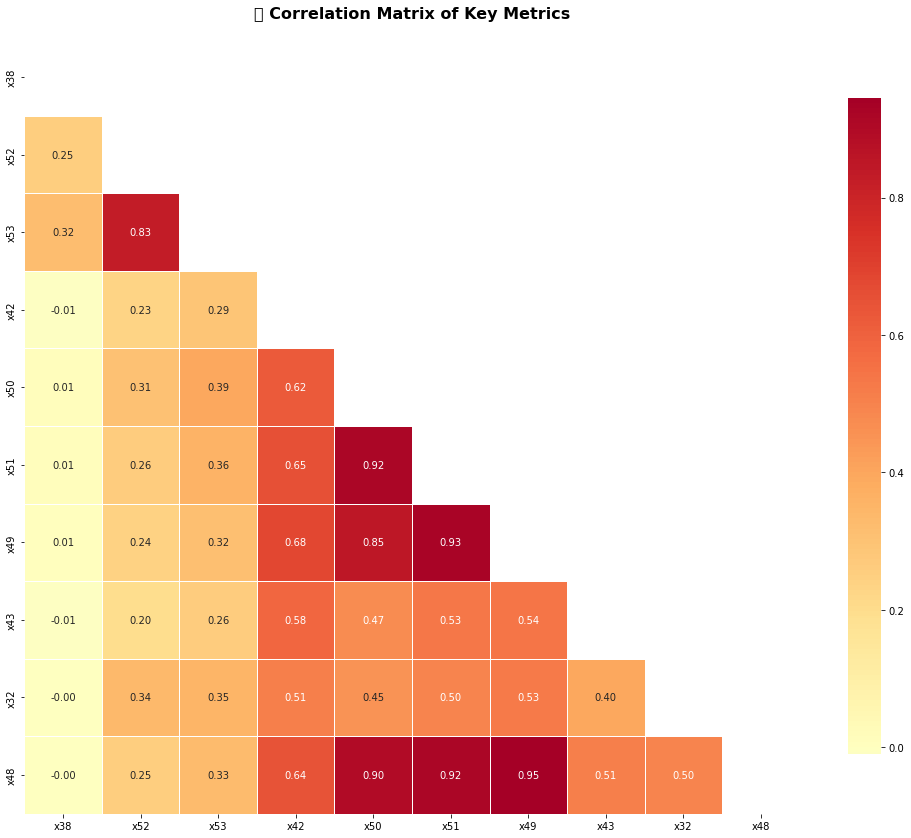

✅ Correlation matrix created!


In [13]:
# 3. Correlation Analysis
print("\n3️⃣ Creating correlation analysis...")
create_correlation_analysis(df, analysis, output_dir)


4️⃣ Creating country analysis...


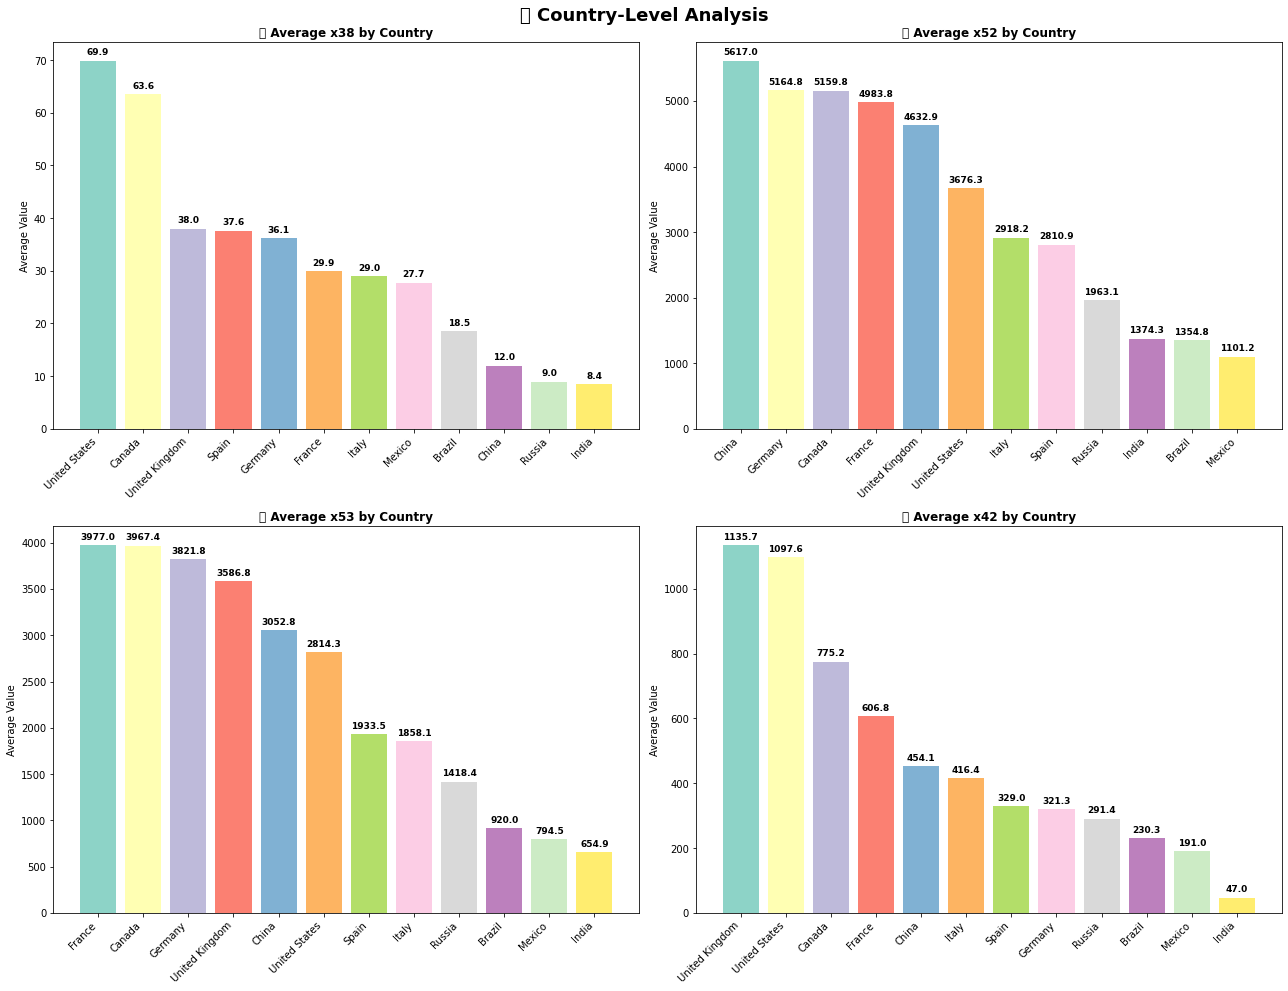

✅ Country analysis created!


In [14]:
# 4. Country Analysis
print("\n4️⃣ Creating country analysis...")
create_country_analysis(df, analysis, output_dir)


5️⃣ Creating distribution analysis...


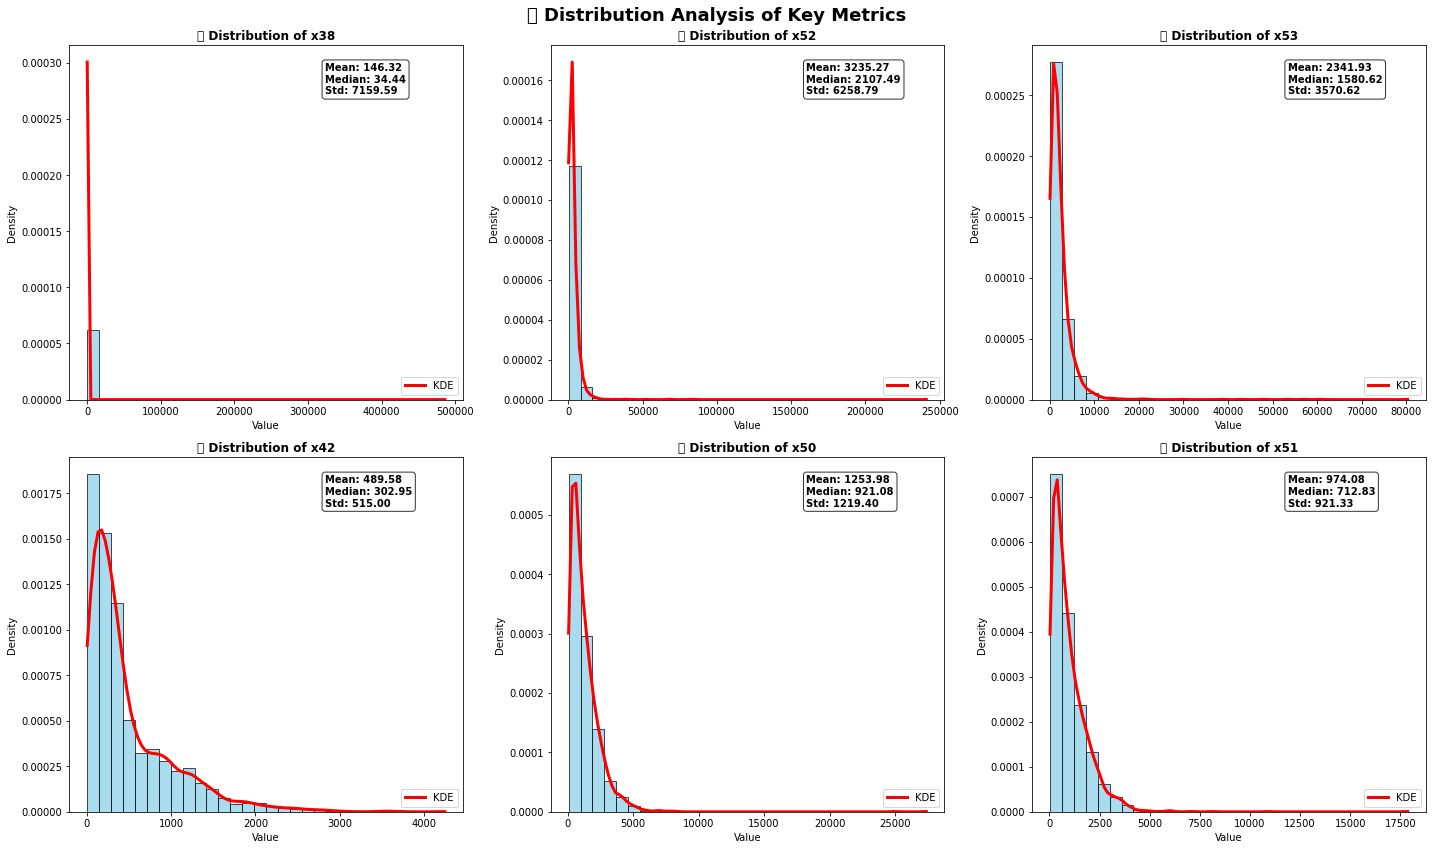

✅ Distribution analysis created!


In [15]:
# 5. Distribution Analysis
print("\n5️⃣ Creating distribution analysis...")
create_distribution_analysis(df, analysis, output_dir)


6️⃣ Creating scatter matrix...


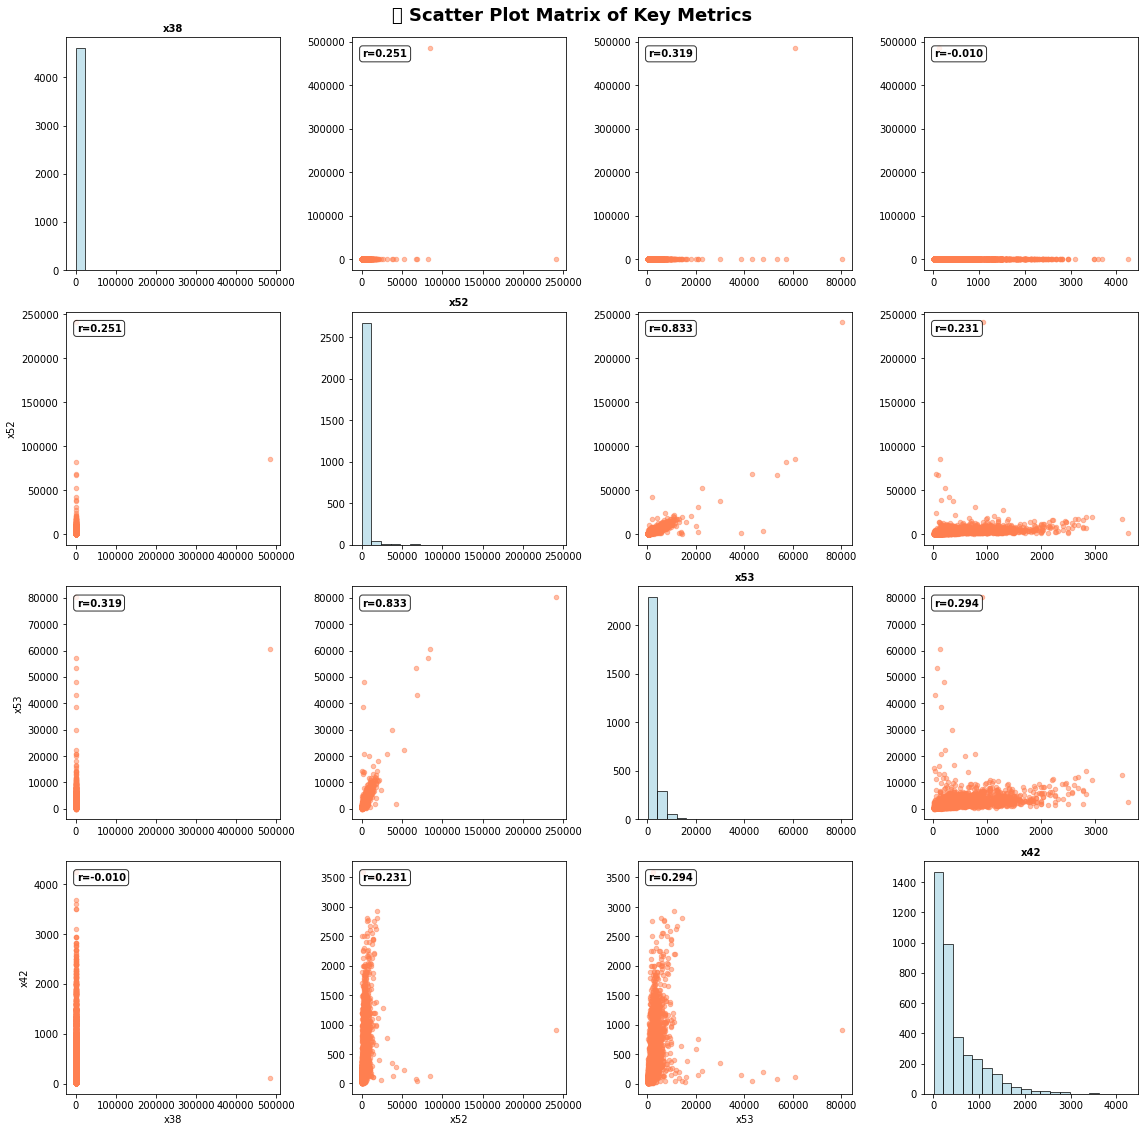

✅ Scatter matrix created!


In [16]:
# 6. Scatter Matrix
print("\n6️⃣ Creating scatter matrix...")
create_scatter_matrix(df, analysis, output_dir)

## 📋 Generate Comprehensive HTML Report

In [17]:
def create_html_report(df, analysis, output_dir):
    """Create comprehensive HTML report"""
    html_path = f"{output_dir}/comprehensive_cost_analysis.html"
    
    # List of visualizations
    visualizations = [
        ("data_overview.png", "📊 Dataset Overview", "Comprehensive overview of data structure, countries, and quality metrics"),
        ("city_rankings.png", "🏆 City Rankings", "Top and bottom performing cities based on key cost metrics"),
        ("correlation_matrix.png", "🔗 Correlation Analysis", "Relationships between different cost-of-living metrics"),
        ("country_analysis.png", "🌍 Country Analysis", "Average cost metrics compared across countries"),
        ("distribution_analysis.png", "📈 Distribution Analysis", "Statistical distributions of key cost metrics"),
        ("scatter_matrix.png", "🔍 Scatter Matrix", "Pairwise relationships between top metrics")
    ]
    
    # Start HTML content
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>🌍 Comprehensive Cost of Living Analysis</title>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <style>
            body {{ 
                font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
                margin: 0;
                padding: 20px;
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                min-height: 100vh;
            }}
            .container {{
                max-width: 1400px;
                margin: 0 auto;
                background: white;
                border-radius: 20px;
                box-shadow: 0 20px 40px rgba(0,0,0,0.1);
                overflow: hidden;
            }}
            .header {{ 
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: white; 
                padding: 3rem 2rem;
                text-align: center;
            }}
            h1 {{ margin: 0; font-size: 3rem; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); }}
            .subtitle {{ font-size: 1.3rem; opacity: 0.9; margin-top: 1rem; }}
            .content {{ padding: 2rem; }}
            .summary-stats {{
                display: grid;
                grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
                gap: 1.5rem;
                margin-bottom: 3rem;
            }}
            .stat-card {{
                background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%);
                color: white;
                padding: 2rem;
                border-radius: 15px;
                text-align: center;
                box-shadow: 0 10px 20px rgba(0,0,0,0.1);
                transform: translateY(0);
                transition: transform 0.3s ease;
            }}
            .stat-card:hover {{ transform: translateY(-5px); }}
            .stat-number {{ font-size: 2.5rem; font-weight: bold; text-shadow: 1px 1px 2px rgba(0,0,0,0.3); }}
            .stat-label {{ font-size: 1rem; opacity: 0.9; margin-top: 0.5rem; }}
            .visualization {{
                background: white;
                margin: 3rem 0;
                border-radius: 15px;
                box-shadow: 0 10px 30px rgba(0,0,0,0.1);
                overflow: hidden;
                transition: transform 0.3s ease;
            }}
            .visualization:hover {{ transform: translateY(-2px); }}
            .viz-header {{
                background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
                color: white;
                padding: 1.5rem 2rem;
                font-size: 1.4rem;
                font-weight: bold;
            }}
            .viz-description {{
                background: #f8f9fa;
                padding: 1rem 2rem;
                font-style: italic;
                color: #666;
            }}
            .viz-content {{ padding: 2rem; text-align: center; }}
            .viz-content img {{ 
                max-width: 100%; 
                height: auto; 
                border-radius: 10px;
                box-shadow: 0 5px 15px rgba(0,0,0,0.1);
            }}
            .insights {{
                background: linear-gradient(135deg, #e3ffe7 0%, #d9f7ff 100%);
                border-left: 5px solid #4facfe;
                padding: 2rem;
                margin: 2rem 0;
                border-radius: 10px;
            }}
            .insights h3 {{ color: #2c3e50; margin-top: 0; }}
            .insights ul {{ padding-left: 1.5rem; }}
            .insights li {{ margin: 0.5rem 0; }}
            table {{ 
                border-collapse: collapse; 
                width: 100%; 
                margin: 2rem 0;
                background: white;
                border-radius: 10px;
                overflow: hidden;
                box-shadow: 0 5px 15px rgba(0,0,0,0.1);
            }}
            th, td {{ 
                padding: 15px 20px; 
                text-align: left; 
            }}
            th {{ 
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: white;
                font-weight: bold;
            }}
            tr:nth-child(even) {{ background-color: #f8f9fa; }}
            tr:hover {{ background-color: #e3f2fd; }}
            .footer {{ 
                text-align: center; 
                color: #666; 
                margin-top: 4rem; 
                padding: 3rem;
                background: #f8f9fa;
                border-radius: 15px;
            }}
            .badge {{
                display: inline-block;
                padding: 0.3rem 0.8rem;
                background: #4facfe;
                color: white;
                border-radius: 20px;
                font-size: 0.8rem;
                font-weight: bold;
                margin: 0.2rem;
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <h1>🌍 Cost of Living Analysis</h1>
                <div class="subtitle">Advanced Analytics Dashboard • Generated {datetime.now().strftime("%B %d, %Y")}</div>
            </div>
            
            <div class="content">
                <div class="summary-stats">
                    <div class="stat-card">
                        <div class="stat-number">{analysis['total_rows']:,}</div>
                        <div class="stat-label">🏙️ Total Cities</div>
                    </div>
                    <div class="stat-card">
                        <div class="stat-number">{analysis['countries']}</div>
                        <div class="stat-label">🌍 Countries</div>
                    </div>
                    <div class="stat-card">
                        <div class="stat-number">{len(analysis['numeric_columns'])}</div>
                        <div class="stat-label">📊 Metrics</div>
                    </div>
                    <div class="stat-card">
                        <div class="stat-number">{analysis['data_quality_range'][1]}</div>
                        <div class="stat-label">📈 Max Quality</div>
                    </div>
                </div>
    """
    
    # Add insights section
    if analysis['most_variable_columns']:
        most_variable = analysis['most_variable_columns'][0][0]
        html_content += f"""
                <div class="insights">
                    <h3>🔍 Key Insights</h3>
                    <ul>
                        <li><strong>Primary Cost Indicator:</strong> <span class="badge">{most_variable}</span> shows the highest variation across cities</li>
                        <li><strong>Geographic Coverage:</strong> Analysis spans {analysis['countries']} countries with {analysis['total_rows']:,} cities worldwide</li>
                        <li><strong>Data Quality:</strong> Quality scores range from {analysis['data_quality_range'][0]} to {analysis['data_quality_range'][1]}</li>
                        <li><strong>Top Variable Metrics:</strong> 
        """
        
        for col, var in analysis['most_variable_columns'][:5]:
            html_content += f'<span class="badge">{col} ({var:.3f})</span> '
        
        html_content += """</li>
                    </ul>
                </div>
        """
    
    # Add visualizations
    for img_file, title, description in visualizations:
        html_content += f"""
                <div class="visualization">
                    <div class="viz-header">{title}</div>
                    <div class="viz-description">{description}</div>
                    <div class="viz-content">
                        <img src="{img_file}" alt="{title}">
                    </div>
                </div>
        """
    
    # Add top cities table
    if analysis['most_variable_columns']:
        primary_metric = analysis['most_variable_columns'][0][0]
        top_cities = df.nlargest(15, primary_metric)
        
        html_content += f"""
                <div class="visualization">
                    <div class="viz-header">🏆 Top 15 Cities by {primary_metric}</div>
                    <div class="viz-description">Detailed ranking of cities with highest values for the primary cost metric</div>
                    <div class="viz-content">
                        <table>
                            <tr>
                                <th>🏅 Rank</th>
                                <th>🏙️ City</th>
                                <th>🌍 Country</th>
                                <th>📊 {primary_metric}</th>
                                <th>📈 Quality Score</th>
                            </tr>
        """
        
        for i, (_, row) in enumerate(top_cities.iterrows(), 1):
            quality_score = row['data_quality'] if 'data_quality' in row else 'N/A'
            html_content += f"""
                            <tr>
                                <td><strong>{i}</strong></td>
                                <td>{row['city']}</td>
                                <td>{row['country']}</td>
                                <td><strong>{row[primary_metric]:.2f}</strong></td>
                                <td>{quality_score}</td>
                            </tr>
            """
        
        html_content += """
                        </table>
                    </div>
                </div>
        """
    
    # Close HTML
    html_content += f"""
                <div class="footer">
                    <h3>📊 Analysis Summary</h3>
                    <p><strong>Report Generated:</strong> {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}</p>
                    <p><strong>Dataset:</strong> {analysis['total_rows']:,} cities across {analysis['countries']} countries</p>
                    <p><strong>Metrics Analyzed:</strong> {len(analysis['numeric_columns'])} cost-of-living indicators</p>
                    <p><strong>Visualizations:</strong> 6 comprehensive analysis charts</p>
                </div>
            </div>
        </div>
    </body>
    </html>
    """
    
    # Write HTML file
    with open(html_path, 'w', encoding='utf-8') as f:
        f.write(html_content)
    
    return html_path

# Generate HTML report
print("\n📋 Generating comprehensive HTML report...")
html_report_path = create_html_report(df, analysis, output_dir)
print(f"✅ HTML report created: {html_report_path}")


📋 Generating comprehensive HTML report...
✅ HTML report created: data/visualizations/comprehensive_cost_analysis.html


## 📊 Analysis Summary

In [18]:
# Final summary
print("\n🎉 ANALYSIS COMPLETE! 🎉")
print("="*50)
print(f"📂 Output Directory: {output_dir}")
print(f"📊 Total Cities Analyzed: {analysis['total_rows']:,}")
print(f"🌍 Countries Covered: {analysis['countries']}")
print(f"📈 Metrics Analyzed: {len(analysis['numeric_columns'])}")
print(f"🎨 Visualizations Created: 6")
print(f"📋 HTML Report: {html_report_path}")

if analysis['most_variable_columns']:
    print(f"\n🔥 Most Important Metric: {analysis['most_variable_columns'][0][0]}")
    
    # Show top 5 cities for the most important metric
    primary_metric = analysis['most_variable_columns'][0][0]
    top_5_cities = df.nlargest(5, primary_metric)
    
    print(f"\n🏆 Top 5 Cities by {primary_metric}:")
    for i, (_, row) in enumerate(top_5_cities.iterrows(), 1):
        print(f"   {i}. {row['city']}, {row['country']} ({row[primary_metric]:.2f})")

print("\n📁 Files Created:")
output_files = [
    "data_overview.png",
    "city_rankings.png", 
    "correlation_matrix.png",
    "country_analysis.png",
    "distribution_analysis.png",
    "scatter_matrix.png",
    "comprehensive_cost_analysis.html"
]

for file in output_files:
    filepath = f"{output_dir}/{file}"
    if os.path.exists(filepath):
        size = os.path.getsize(filepath) / 1024  # KB
        print(f"   ✅ {file} ({size:.1f} KB)")
    else:
        print(f"   ❌ {file} (not found)")

print(f"\n🌐 Open the HTML report to view all visualizations in one place!")
print(f"   File: {os.path.abspath(html_report_path)}")


🎉 ANALYSIS COMPLETE! 🎉
📂 Output Directory: data/visualizations
📊 Total Cities Analyzed: 4,956
🌍 Countries Covered: 215
📈 Metrics Analyzed: 55
🎨 Visualizations Created: 6
📋 HTML Report: data/visualizations/comprehensive_cost_analysis.html

🔥 Most Important Metric: x38

🏆 Top 5 Cities by x38:
   1. Honiara, Solomon Islands (485991.77)
   2. Kabul, Afghanistan (715.63)
   3. Stanley, Falkland Islands (574.41)
   4. Mount Hagen, Papua New Guinea (568.99)
   5. Dire Dawa, Ethiopia (540.00)

📁 Files Created:
   ✅ data_overview.png (386.7 KB)
   ✅ city_rankings.png (476.6 KB)
   ✅ correlation_matrix.png (238.0 KB)
   ✅ country_analysis.png (488.9 KB)
   ✅ distribution_analysis.png (520.5 KB)
   ✅ scatter_matrix.png (665.7 KB)
   ✅ comprehensive_cost_analysis.html (15.5 KB)

🌐 Open the HTML report to view all visualizations in one place!
   File: /home/jovyan/data/visualizations/comprehensive_cost_analysis.html
